# word search

Feb 25 2021


In [103]:
import random
import time
import timeit
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# utility functions

def get_words(n, wordsfile='/usr/share/dict/words'):
    """ Return list of n words """
    # Note that the lines when read in end in newlines; strip() gets rid of that.
    # Ignore words ending in 's or fewer than three letters or Capitalized.
    # Google "python random" for docs on random.sample.
    words = []
    for line in open(wordsfile):
        word = line.strip()
        if word.islower() and word[-2:] != "'s" and len(word) > 2:
            words.append(word)
    return random.sample(words, n)
    
def elapsed_sec(function, toofast=0.05):
    """ Return number of seconds it takes to run a given function. """
    #
    # The approach here is
    #   (a) run it n times and divide by n if it runs too fast to measure,
    #   (b) pick a reasonable value for n by starting small and doubling
    # See also https://docs.python.org/3/library/timeit.html .
    #
    # If you have a function like f(x) and you want to run that with x=10,
    # then pass in lambda:f(10) as the function argument;
    # see https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions
    #
    n = 1
    while True:
        start_time = time.time()              # start timer
        for i in range(n):
            function()
        seconds = time.time() - start_time    # stop timer
        if seconds > toofast:
            return seconds/n
        else:
            n *= 2


In [127]:
# An example of Python's lambda function notation : 
f = lambda x: 2*x+1
f(10)

21

In [128]:
# Examples of get_words() and elapsed_sec() : 
print(f"4 words : {get_words(4)}")
print(f"time to get 100 words : {elapsed_sec(lambda:get_words(100)):.4f} sec.")

4 words : ['peopled', 'castoffs', 'pliable', 'bibliographical']
time to get 100 words : 0.0757 sec.


In [113]:
# Let's visualize how long that takes for different values of n.
ns = [100, 300, 1000, 3000, 10000, 30000]
secs = [elapsed_sec(lambda:get_words(n)) for n in ns]
print(f"secs = {secs}")

secs = [0.07015085220336914, 0.058068037033081055, 0.05502915382385254, 0.05725407600402832, 0.06629180908203125, 0.09157991409301758]


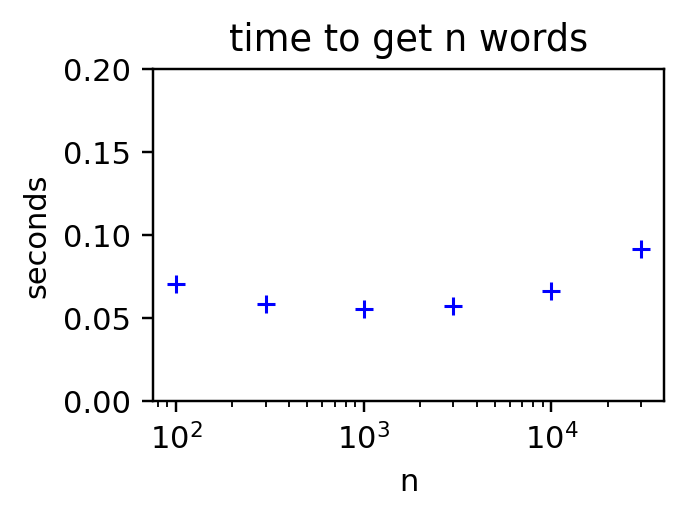

In [137]:
# And now let's make a plot of that.
# Note that some possible plot commands are 
#  (axis.semilogx, axis.semilogy, axis.loglog, axis.plot)
# depending on whether you want a log scale on x, y, both, or neither.

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time to get n words")
axis.set_ylim((0,0.2))
axis.semilogx(ns, secs, marker="+", color="blue", linestyle="none")
plt.show()


What does that plot tell us?

Well, there isn't any obvious trend here. What's going on is that most of them time is spent in opening up and reading the (large) file, which we're currently doing every time, no matter how many words we want. 

This is O(1), in other words about the same amount of time regardless of n.

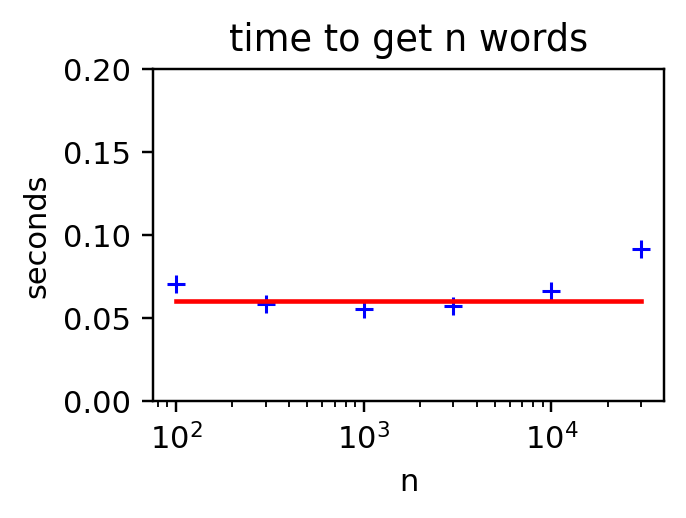

In [142]:
# Here's the same plot with a horizontal line added, showing that this is O(1).
x = np.linspace(ns[0], ns[-1], 100)  # 100 points
y = np.zeros(len(x)) + 0.06          # 100 points, all 0.05 (eyeballing an OK line.)

figure = plt.figure(dpi=220, figsize=(3, 2))   # dots_per_inch and (width, height) in inches
axis = figure.add_subplot(111)                 # 111 indicates (rows,cols,number) i.e. 1x1 #1 .
axis.set(xlabel="n", ylabel="seconds", title="time to get n words")
axis.set_ylim((0,0.2))
axis.semilogx(ns, secs, marker="+", color="blue", linestyle="none")

axis.semilogx(x, y, color='red')  # Here's the added line.

plt.show()

## TODO in class

Python review/reminder :

* keyword arguments
* lambda function
* import
* where to find documentation

## Notebook review/reminder :

* evaluating cells : order matters; "state" of what's been done matters
* keyboard shortcuts
* markdown vs python cells

## How to turn in one of these notebooks as homework :

* File >> Download As >> HTML     (.html)
* File >> Downlaod As >> Notebook (.ipynb)
* "Drag and Drop" both files onto the "attachments" region when editing the work submission page

linear search
---------------

First, write a function which searches a list of n words for a given word,
by starting at i=0, looking at each word[i], and incrementing i.

Then measure how long that takes to run for different values of n.

Discuss : "worst case", "best case", "average case"

Do timing for both (a) can find word, (b) can't find word.

Make a plot of (time, n). 

What O() behavior is this? Why?

binary search
----------------

Second, repeat all of that with a binary search algorithm.

This only words if the list is sorted. For now we'll just sort
the list with Python's built-in stuff, and not look at that time.
If we're given a sorted list, we could use a binary search to 
look things up, for example looking up names in a phone book.

Look up "binary search" and explain the algorithm.

Do timing and make the plot again. What O() behavior is this? Why?

Discuss number of times through loop if n=128, 64, 32, ...

hash table
------------

Third, repeat all of that with a python built-in dictionary.

We won't (for now) discuss how the dictionary works, just plop
all the data into the dictionary initially. Then look up words
and do the timing again. Make a plot. What O() is this?

Then make a plot which all three cases on one graph.

Discuss advantages and disadvanages to each approach.

* How much preparation time does it take?
* How much memory does it take?
* How expensive is it to add more words? Remove words?